In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

import pymc3 as pm
import theano.tensor as tt
import theano as T
plt.style.use("seaborn-darkgrid")
sns.set_context("paper")

def generate_data(K,alpha,beta):
    w = np.random.beta(alpha,beta,size=(K,K))
    groups = []
    for i in range(K):
        for j in range(K):
            group = np.random.binomial(1,w[i,j],size = (10,10))
            groups.append(group)

    temp_mats = []
    for i in range(K):
        temp_mat = np.concatenate([groups[i*K+j] for j in range(K)],axis =1)
        temp_mats.append(temp_mat)
    mat = np.concatenate(temp_mats)
    random_row_delete= np.random.randint(0,mat.shape[0],7)
    random_col_delete= np.random.randint(0,mat.shape[1],7)
    mat = np.delete(mat,random_row_delete,axis=0 )
    mat = np.delete(mat,random_col_delete,axis=1 )
    return mat,w
# The data is not shuffled yet
data,true_w = generate_data(3,0.5,0.5)


def stick_breaking(beta):
    portion_remaining = tt.concatenate([[1], tt.extra_ops.cumprod(1 - beta)[:-1]])
    return beta * portion_remaining

def cartesian_to_row_index(i,j,shape):
    return i*shape[1] + j

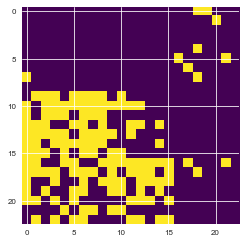

In [7]:
plt.imshow(data, cmap='viridis')

In [8]:
K = 3
with pm.Model() as model:
    alpha = pm.Gamma('alpha', 1., 1.)
    beta = pm.Beta('beta', 1., alpha, shape=K)
    w = pm.Deterministic('w', stick_breaking(beta))
    z = pm.Categorical("z", p=w, shape=data.shape[0])

    rho = pm.Beta("rho", 1, 1, shape=(K, K))
    r = pm.Bernoulli('r', p=rho[z[:,None], z], observed=data)
    trace = pm.sample(1000, tune=1000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [rho, beta, alpha]
>CategoricalGibbsMetropolis: [z]
Sampling 4 chains: 100%|██████████| 8000/8000 [00:09<00:00, 807.29draws/s]
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.
The gelman-rubin statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


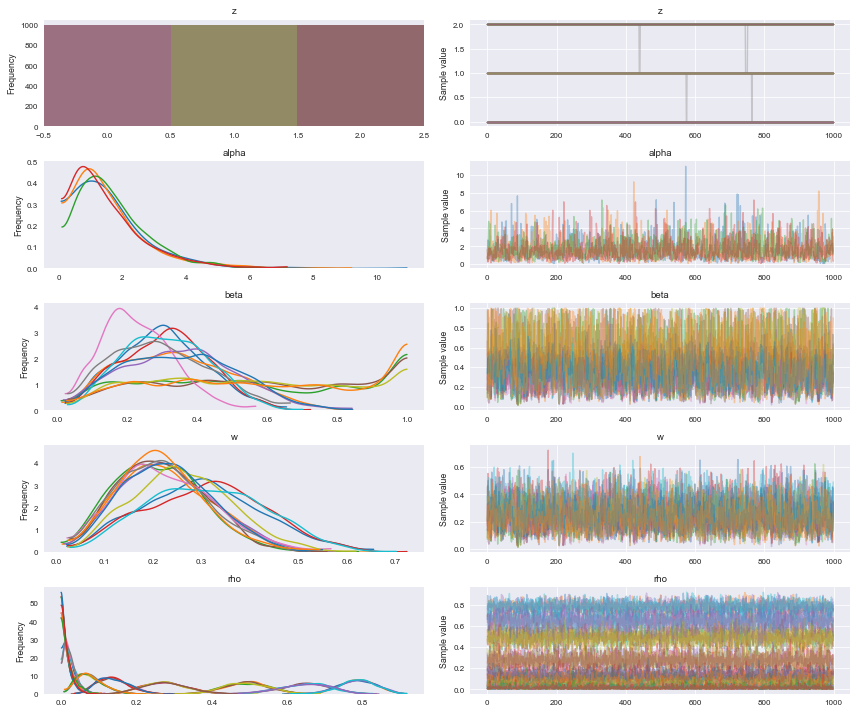

In [10]:
pm.traceplot(trace);

In [11]:
pm.summary(trace)

,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
z__0,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__1,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__2,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__3,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__4,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__5,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__6,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__7,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__8,0.500000,0.866025,0.086603,0.000000e+00,2.000000,NaN,inf
z__9,1.000000,0.707107,0.070711,0.000000e+00,2.000000,NaN,inf
